# Hypothesis

#### All platforms

The favourite genre across all plataforms is fiction.

2023 bestsellers in indie bookshops were cheaper than 2023 bestsellers in amazon.

The top ten bestsellers in amazon didn't include any genre other than fiction.

The top ten bestsellers in indie bookshops included other genres in addition to fiction.

#### Indie spanish bookshops in 2020 vs 2023

There were no differences in the top five editorials for both years.

There were more foreign bestselling publications in 2023.

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Format

In [2]:
sns.set(rc={"figure.figsize": (5, 4)}, font_scale=0.75)
sns.set_style("white")

# Exploring Amazon

50 bestsellers from 2020

50 bestsellers from 2021

50 bestsellers from 2022

In [3]:
amazon_csv = pd.read_csv("../data/amazon_projectII.csv")

## Genres

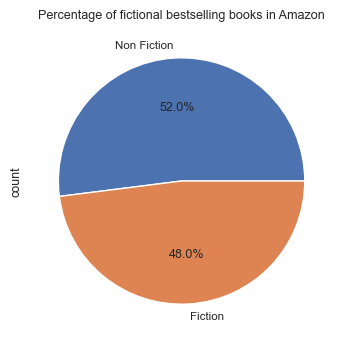

In [4]:
amazon_genres = amazon_csv["genre"].value_counts().plot.pie(autopct="%.1f%%");
amazon_genres.set(title = "Percentage of fictional bestselling books in Amazon");

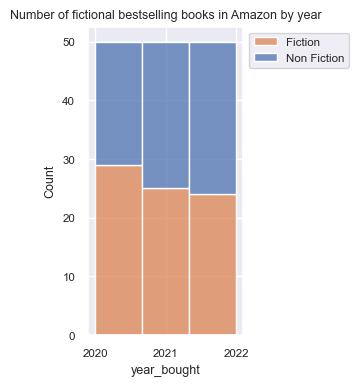

In [5]:
sns.set(rc={"figure.figsize": (2, 4)}, font_scale=0.75)
amazon_genres_years = sns.histplot(amazon_csv, x="year_bought", hue = "genre", multiple="stack", bins = 3)
amazon_genres_years.set(title = "Number of fictional bestselling books in Amazon by year")
amazon_genres_years.legend(["Fiction", "Non Fiction"], bbox_to_anchor=(1, 1));

## Prices

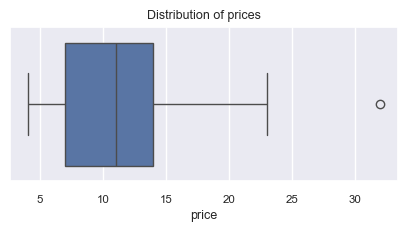

In [62]:
sns.set(rc={"figure.figsize": (5, 2)}, font_scale=0.75)
amazon_prices_box = sns.boxplot(x=amazon_csv["price"])
amazon_prices_box.set(title = "Distribution of prices");

<Figure size 500x500 with 0 Axes>

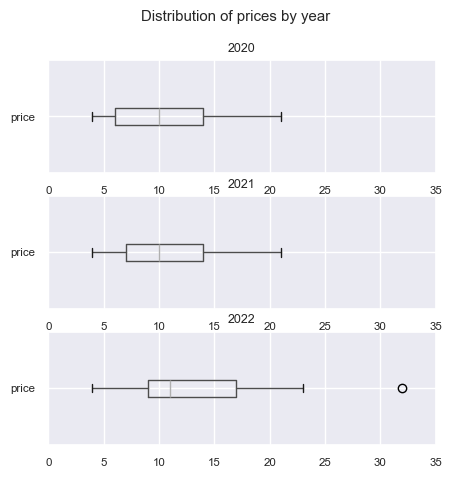

In [7]:
sns.set(rc={"figure.figsize": (5, 5)}, font_scale=0.75)
plt.figure()
fig, axs = plt.subplots(nrows=3)
fig.suptitle("Distribution of prices by year")
prueba = amazon_csv[amazon_csv["year_bought"] == 2020].boxplot(column="price", ax=axs[0], vert=False)
prueba.set_xlim(0,35)
prueba = amazon_csv[amazon_csv["year_bought"] == 2021].boxplot(column="price", ax=axs[1], vert=False)
prueba.set_xlim(0,35)
prueba = amazon_csv[amazon_csv["year_bought"] == 2022].boxplot(column="price", ax=axs[2], vert=False)
prueba.set_xlim(0,35)

axs[0].set_title("2020")
axs[1].set_title("2021")
axs[2].set_title("2022")

fig.savefig("../figures/Distribution of prices by year_Amazon.png")

## Top 10 bestsellers of each year

In [8]:
amazon_top_2020 = amazon_csv[amazon_csv["year_bought"] == 2020].head(10)
amazon_top_2021 = amazon_csv[amazon_csv["year_bought"] == 2021].head(10)
amazon_top_2022 = amazon_csv[amazon_csv["year_bought"] == 2022].head(10)

In [9]:
amazon_top_2020.genre.value_counts()

genre
Fiction        5
Non Fiction    5
Name: count, dtype: int64

In [10]:
amazon_top_2021.genre.value_counts()

genre
Fiction        6
Non Fiction    4
Name: count, dtype: int64

In [11]:
amazon_top_2022.genre.value_counts()

genre
Fiction        7
Non Fiction    3
Name: count, dtype: int64

In [12]:
amazon_top = pd.concat([amazon_top_2020, amazon_top_2021, amazon_top_2022])

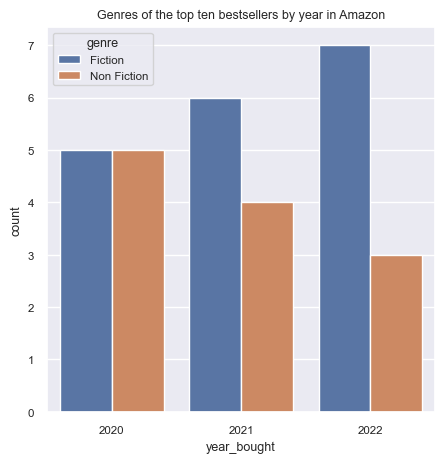

In [13]:
plt.figure()
sns.set(rc={"figure.figsize": (5, 4)}, font_scale=0.75)
amazon_genres_years = sns.countplot(data = amazon_top , hue ="genre", x="year_bought" )
amazon_genres_years.set(title = "Genres of the top ten bestsellers by year in Amazon");

# Exploring indie bookshops (dataset, 2020)

In [29]:
spanish_csv = pd.read_csv("../data/spanish_projectII.csv")

In [30]:
spanish_csv.sort_values(by = "order", inplace=True)

In [31]:
spanish_csv.columns

Index(['order', 'title', 'author', 'genre', 'editorial', 'country', 'language',
       'orig_language', 'pages', 'date', 'year_pub'],
      dtype='object')

## Genres

In [32]:
# The favourite genre across all plataforms is fiction.
spanish_csv["genre"].value_counts()

# Some genres are not correct in the downloaded dataset
    # Español / Castellano
    # c. 1700-c. 1800
    # Sicilia
    # EUROPA
    # a.     e. c.-c. 500 c. e.
    # lst_nan = []
    # Edad de interés: a partir de 9 años
    # Edad de interés: a partir de 10 años
    # Edad de interés: a partir de 5 años
    # Español / Castellano
    # c. 1700-c. 1800
    # Sicilia
    # EUROPA
    # a.     e. c.-c. 500 c. e.
    # Edad de interés: a partir de 8 años

genre
Ficción moderna y contemporanea                                                       22
Obra de misterio y suspense                                                            8
Género policíaco y misterio                                                            7
Novelas gráficas: manga                                                                4
Edad de interés: a partir de 10 años                                                   4
Ficción histórica                                                                      3
Narrativa romántica adulta y contemporánea                                             3
Cuestiones personales y sociales: autoconocimiento y autoestima (infantil/juvenil)     2
Narrativa romántica histórica                                                          2
Relatos sobre la familia y el hogar (infantil/juvenil)                                 2
Fantasía y realismo mágico (infantil/juvenil)                                          2
Ensayos literar

In [33]:
lst_fiction = ["Ficción moderna y contemporanea", "Obra de misterio y suspense", "Género policíaco y misterio",
               "Novelas gráficas: manga", "Ficción histórica", "Narrativa romántica adulta y contemporánea",
               "Narrativa romántica histórica", "Relatos sobre la familia y el hogar (infantil/juvenil)",
               "Fantasía y realismo mágico (infantil/juvenil)", "Aventura histórica",
               "Ficción de crimen y misterio (infantil/juvenil)", "Relatos de aventuras (infantil/juvenil)",
               "FICCIÓN E HISTORIAS REALES INFANTILES Y JUVENILES", "Ficción general (infantil/juvenil)",
               "Poesía de poetas individuales", "Relatos románticos y de relaciones interpersonales (infantil/juvenil)",
               "Ficción clásica (infantil/juvenil)", "MITOS Y LEYENDAS NARRADOS COMO FICCIÓN", "Thriller (infantil/juvenil)",
               "Cómics y novelas gráficas", "Libros de cuentos ilustrados"]
lst_nofiction = ["Cuestiones personales y sociales: autoconocimiento y autoestima (infantil/juvenil)", "Ensayos literarios",
                 "Filosofía social y política", "Biografía: literaria", "Autoayuda y desarrollo personal",
                 "ESTILO DE VIDA, DEPORTE Y OCIO", "Mente, cuerpo y espíritu: pensamiento y práctica",
                 "Feminismo y teoría feminista", "Juegos de PC/ordenador/en línea: guías de estrategia", 
                 "Terapias complementarias, curación y salud", "Memorias", "Historia general y mundial", 
                 "TRATAMIENTOS Y MATERIAS ARTÍSTICAS", "Misterios, lo sobrenatural, monstruos y seres mitológicos (infantil/juvenil)",
                 "Familia y Salud", "Filosofía", "Antropología", "Forma física y alimentación", "Historias reales"]

def clasif(x):
    if x["genre"] in lst_fiction:
        return "fiction"
    elif x["genre"] in lst_nofiction:
        return "non-fiction"
    else:
        return None
    
spanish_csv["genres_clasif"] = spanish_csv.apply(clasif, axis=1)

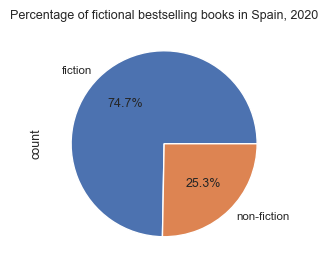

In [34]:
plt.figure()
spanish_genres = spanish_csv["genres_clasif"].value_counts().plot.pie(autopct="%.1f%%");
spanish_genres.set(title = "Percentage of fictional bestselling books in Spain, 2020");

## Prices
Not available in the downloaded dataset

## Top 10 bestsellers

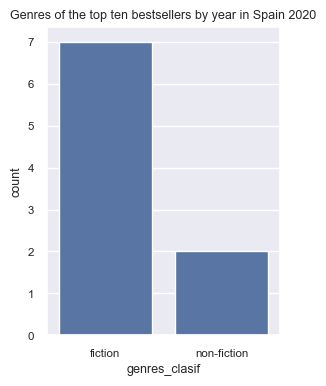

In [35]:
plt.figure()
sns.set(rc={"figure.figsize": (3, 4)}, font_scale=0.75)
spanish_genres = sns.countplot(data = spanish_csv.head(10) , x ="genres_clasif")
spanish_genres.set(title = "Genres of the top ten bestsellers by year in Spain 2020");

## Editorials

In [36]:
spanish_csv["editorial"]

23                  SUMA
28             ALFAGUARA
36     Tusquets Editores
45               Siruela
53     Fórcola Ediciones
             ...        
63     Ediciones Destino
82         PLAZA & JANES
87    Editorial Anagrama
89       Editorial Hidra
94               Austral
Name: editorial, Length: 100, dtype: object

C:\Users\gdcma\AppData\Local\Temp\ipykernel_3052\871356343.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  editorials_2020.set_xticklabels(editorials_2020.get_xticklabels(), rotation=45, horizontalalignment='right');


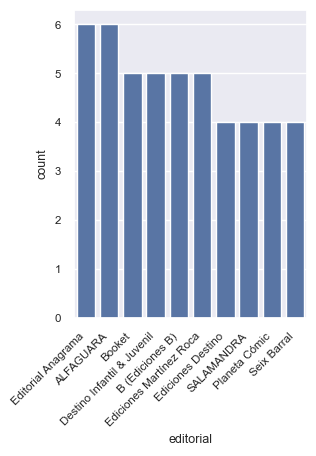

In [37]:
plt.figure()
sns.set(rc={"figure.figsize": (3, 4)}, font_scale=0.75)
editorials_2020 = sns.countplot(data = spanish_csv , x="editorial", order = spanish_csv["editorial"].value_counts().iloc[:10].index)
editorials_2020.set_xticklabels(editorials_2020.get_xticklabels(), rotation=45, horizontalalignment='right');

## Foreign books

In [38]:
spanish_csv["orig_language"].value_counts().head()

orig_language
Español    63
Inglés     20
Francés     6
Japonés     4
Sueco       2
Name: count, dtype: int64

C:\Users\gdcma\AppData\Local\Temp\ipykernel_3052\424182929.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  foreign_2020.set_xticklabels(foreign_2020.get_xticklabels(), rotation=45, horizontalalignment='right');


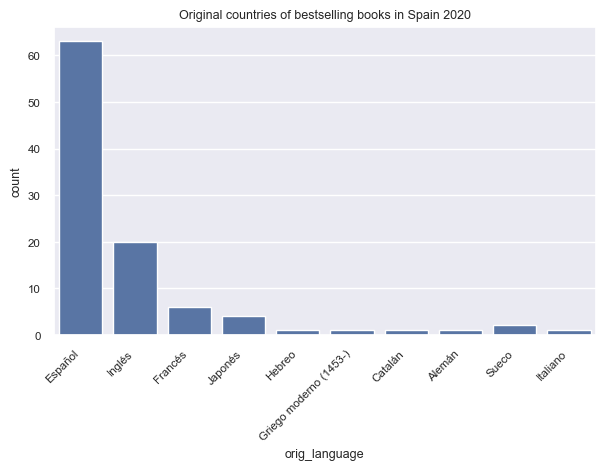

In [113]:
plt.figure()
sns.set(rc={"figure.figsize": (3, 4)}, font_scale=0.75)
foreign_2020 = sns.countplot(data = spanish_csv , x="orig_language")
foreign_2020.set_xticklabels(foreign_2020.get_xticklabels(), rotation=45, horizontalalignment='right');
foreign_2020.set(title = "Original countries of bestselling books in Spain 2020");

# Exploring indie bookshops (scrapping, 2023)

In [66]:
web_csv = pd.read_csv("../data/web_projectII.csv")

## Genre

In [67]:
pd.Series(web_csv["genre"]).tolist()

["['Género policíaco y misterio', 'Obra de espionaje y espías']",
 "['Ficción histórica', 'Obra de misterio y suspense', 'Ficción moderna y contemporanea']",
 "['Ficción de las guerras napoleónicas', 'Ficción histórica']",
 "['Ficción moderna y contemporanea']",
 "['HUMOR', 'Edad de interés: a partir de 10 años', 'Cómics y novelas gráficas']",
 "['Religión y creencias']",
 "['Islas griegas', 'Ficción moderna y contemporanea', 'Género policíaco y misterio']",
 "['Mente, cuerpo y espíritu: pensamiento y práctica', 'Afirmación personal, motivación y autoestima', 'APLICACIONES EMPRESARIALES', 'Estrategias y políticas educativas', 'Autoayuda y desarrollo personal']",
 "['Ficción histórica', 'Nueva York', 'Ficción moderna y contemporanea']",
 "['Ficción moderna y contemporanea']",
 "['Francia', 'CIENCIA: CUESTIONES GENERALES']",
 "['Religión y creencias']",
 "['Música: estilos y géneros', 'Actores e intérpretes', 'Autobiografía: arte y espectáculo']",
 "['Ficción moderna y contemporanea']",


In [68]:
lst_fiction = ["['Género policíaco y misterio', 'Obra de espionaje y espías']",
               "['Ficción histórica', 'Obra de misterio y suspense', 'Ficción moderna y contemporanea']",
               "['Ficción de las guerras napoleónicas', 'Ficción histórica']", "['Ficción moderna y contemporanea']",
               "['Islas griegas', 'Ficción moderna y contemporanea', 'Género policíaco y misterio']",
               "['HUMOR', 'Edad de interés: a partir de 10 años', 'Cómics y novelas gráficas']",
               "['Ficción histórica', 'Nueva York', 'Ficción moderna y contemporanea']",
               "['Ficción moderna y contemporanea']", "['Ficción moderna y contemporanea']",
               "['Perú', 'Música del mundo', 'Ficción moderna y contemporanea']",
               "['Noruega', 'Ficción moderna y contemporanea']",
               "['Edad de interés: a partir de 12 años', 'Cuestiones personales y sociales: autoconocimiento y autoestima (infantil/juvenil)', 'Ficción general (infantil/juvenil)']",
               "['Fantasía']", "['Cuentos de terror y fantasmas', 'Obra de misterio y suspense']", "['Novelas gráficas']",
               "['Género policíaco y misterio']",
               "['Narrativa romántica', 'Ficción erótica', 'Ficción moderna y contemporanea', 'Edad de interés: a partir de 14 años', 'Ficción general (infantil/juvenil)']",
               "['Ficción moderna y contemporanea']", "['Ficción histórica']", "['Ficción moderna y contemporanea']",
               "['Relatos sobre la escuela (infantil/juvenil)', 'Caricaturas e historietas (infantil/juvenil)', 'Relatos de humor (infantil/juvenil)']",
               "['Noruega', 'Europa del Norte, Escandinavia', 'Narrativa romántica adulta y contemporánea', 'Obra de misterio y suspense', 'Ficción moderna y contemporanea', 'EUROPA', 'Literatura y estudios literarios']",
               "['Edad de interés: a partir de 10 años', 'Cuestiones personales y sociales: autoconocimiento y autoestima (infantil/juvenil)', 'Ficción clásica (infantil/juvenil)']",
               "['Autobiografía: general', 'Ficción moderna y contemporanea']",
               "['Obra de misterio y suspense', 'Género policíaco y misterio']",
               "['Patinaje sobre hielo', 'Narrativa romántica adulta y contemporánea']",
               "['Islas Baleares, Comunidad Autónoma de', 'Ficción moderna y contemporanea']",
               "['Ficción moderna y contemporanea']", "['Género policíaco y misterio']",
               "['Relatos románticos y de relaciones interpersonales (infantil/juvenil)', 'Edad de interés: a partir de 14 años', 'Fantasía y realismo mágico (infantil/juvenil)']",
               "['Japón', 'Cocina nacional y regional', 'Género policíaco y misterio']",
               "['Fantasía', 'MITOS Y LEYENDAS NARRADOS COMO FICCIÓN', 'Ficción moderna y contemporanea']",
               "['Ficción histórica', 'Inglaterra', 'Ficción moderna y contemporanea']",
               "['Cómics y novelas gráficas', 'Edad de interés: a partir de 8 años', 'Novelas gráficas: manga']",
               "['Madrid, Comunidad de', 'Ficción moderna y contemporanea']",
               "['Relatos románticos y de relaciones interpersonales (infantil/juvenil)']", "['Ficción moderna y contemporanea']",
               "['Italia', 'Ficción moderna y contemporanea']",  "['Ficción moderna y contemporanea']",
               "['Historia: acontecimientos y temas específicos', 'Historia del siglo xxi: c. 2000-', 'Ficción moderna y contemporanea']",
               "['Misterios, lo sobrenatural, monstruos y seres mitológicos (infantil/juvenil)', 'Ficción de crimen y misterio (infantil/juvenil)', 'Relatos de aventuras (infantil/juvenil)', 'Edad de interés: a partir de 6 años', 'Dinosaurios y el mundo prehistórico (infantil/juvenil)']",
               "['Siglo xx', 'Ficción moderna y contemporanea', 'Sagas']", "['FICCIÓN E HISTORIAS REALES INFANTILES Y JUVENILES']",
               "['FICCIÓN E HISTORIAS REALES INFANTILES Y JUVENILES', 'España', 'Español / Castellano', 'Edad de interés: a partir de 14 años']",
               "['Género policíaco y misterio', 'Ficción moderna y contemporanea', 'Obra de misterio y suspense']",
               "['Edad de interés: a partir de 8 años', 'Thriller (infantil/juvenil)', 'Fantasía y realismo mágico (infantil/juvenil)']",
               "['Ficción moderna y contemporanea']", "['Novela gráfica y manga como obra de arte', 'Novelas gráficas']",
               "['Ficción general (infantil/juvenil)', 'Relatos de humor (infantil/juvenil)', 'Relatos de aventuras (infantil/juvenil)']",
               "['Ficción moderna y contemporanea', 'Aventura histórica', 'Misterios históricos']",
               "['Obra de suspense político y judicial']", "['Novelas gráficas']",
               "['Obra de misterio y suspense', 'Género policíaco y misterio', 'Ficción moderna y contemporanea', 'Obra de suspense político y judicial']",
               "['c. 1960\\x96c. 1970', 'Estados Unidos de América', 'Ficción moderna y contemporanea']",
               "['Fantasía romántica (juvenil)', 'Ficción general (infantil/juvenil)', 'Edad de interés: a partir de 14 años', 'Ficción moderna y contemporanea']",
               "['Ficción clásica']", "['Ficción moderna y contemporanea']",
               "['Italia', 'Irlanda', 'Ficción moderna y contemporanea']",
               "['FICCIÓN E HISTORIAS REALES INFANTILES Y JUVENILES', 'España', 'Español / Castellano', 'Edad de interés: a partir de 12 años']",
               "['Ficción moderna y contemporanea']", "['Género policíaco y misterio']",
               "['Sagas', 'Narrativa romántica histórica']",
               "['Español / Castellano', 'Francia', 'Ficción moderna y contemporanea']",
               "['Edad de interés: a partir de 6 años', 'Cuentos tradicionales', 'Relatos de aventuras (infantil/juvenil)']",
               "['Obra de misterio y suspense', 'Género policíaco y misterio', 'Ficción moderna y contemporanea']",
               "['Ficción moderna y contemporanea', 'Ficción y temas afines', 'Cuentos de terror y fantasmas']",
               "['Ficción moderna y contemporanea']"
              ]

lst_nofiction = ["['Religión y creencias']",
                 "['Mente, cuerpo y espíritu: pensamiento y práctica', 'Afirmación personal, motivación y autoestima', 'APLICACIONES EMPRESARIALES', 'Estrategias y políticas educativas', 'Autoayuda y desarrollo personal']",
                 "['Francia', 'CIENCIA: CUESTIONES GENERALES']",
                 "['Música: estilos y géneros', 'Actores e intérpretes', 'Autobiografía: arte y espectáculo']",
                 "['Estudios generales']", "['Autoayuda y desarrollo personal']", "['Estudios generales']",
                 "['Anuarios, almanaques, publicaciones anuales']",
                 "['Divulgación científica', 'Invenciones e inventores', 'Crímenes reales: descubrimientos/históricas/científicas']",
                 "['Prosa: no ficción']", "['Autoayuda y desarrollo personal']",
                 "['Autoayuda y desarrollo personal', 'Afirmación personal, motivación y autoestima']",
                 "['Afirmación personal, motivación y autoestima', 'Mente, cuerpo y espíritu: meditación y visualización']",
                 "['Mente, cuerpo y espíritu: pensamiento y práctica']",
                 "['Historia social y cultural', 'Historia: acontecimientos y temas específicos', 'c. 1700-c. 1800', 'Revoluciones, levantamientos y rebeliones']",
                 "['El Holocausto', 'Psicoterapia', 'c. 1939-c. 1945 (incluye la Segunda Guerra Mundial)', 'Español / Castellano', 'Psicología']",
                 "['Antigua Roma', 'Historia antigua: hasta c. 500 e. c.']",
                 "['Violencia en la sociedad', 'Comunidades rurales', 'Cuestiones y procesos sociales']",
                 "['Biografía: literaria', 'Biografía: general', 'Biografía e historias relaes', 'Asia Oriental, Lejano Oriente', 'Literatura de viajes']",
                 "['Finanzas personales', 'Economía']", "['Psicoterapia']", "['Historia']", "['Medicina popular y salud']",
                 "['Cuestiones personales y sociales: autoconocimiento y autoestima (infantil/juvenil)', 'Edad de interés: a partir de 3 años', 'Álbumes ilustrados']",
                 "['Autoayuda y desarrollo personal', 'Poesía', 'Afirmación personal, motivación y autoestima']",
                 "['Reportajes y colección de artículos periodísticos']", "['Dietética y nutrición', 'Dietas y régimen alimenticio']",
                 "['Cuestiones personales y sociales: sexualidad y relaciones interpersonales (infantil/juvenil)', 'Cuestiones personales y sociales: cuerpo y salud (infantil/juvenil)', 'Álbumes ilustrados']",
                 "['Fenómenos inexplicables/paranormales', 'Ovnis y seres extraterrestres']",
                 "['Política y Gobierno', 'Historia']",
                 "['Halloween', 'ARTÍCULOS DE ESCRITORIO INFANTILES Y VARIOS', 'Aprendizaje temprano/conceptos de aprendizaje temprano', 'Libros y paquetes interactivos y de actividades', 'Álbumes ilustrados', 'Para niños c. 0-2 años', 'Libros para bebés']",
                 "['Astrología', 'Jardinería', 'Agricultura orgánica', 'Horticultura', 'AGRICULTURA Y EXPLOTACIÓN AGROPECUARIA']"
                ]


def clasif(x):
    if x["genre"] in lst_fiction:
        return "fiction"
    elif x["genre"] in lst_nofiction:
        return "non-fiction"
    else:
        return None
    
web_csv["genres_clasif"] = web_csv.apply(clasif, axis=1)

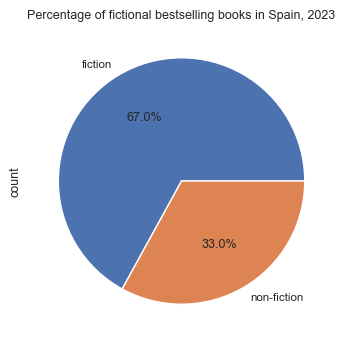

In [69]:
plt.figure()
web_genres = web_csv["genres_clasif"].value_counts().plot.pie(autopct="%.1f%%");
web_genres.set(title = "Percentage of fictional bestselling books in Spain, 2023");

## Prices

In [70]:
web_csv["price"] = web_csv["price"].str.extract("(.{1,6})€")
web_csv["price"] = pd.to_numeric(web_csv["price"])

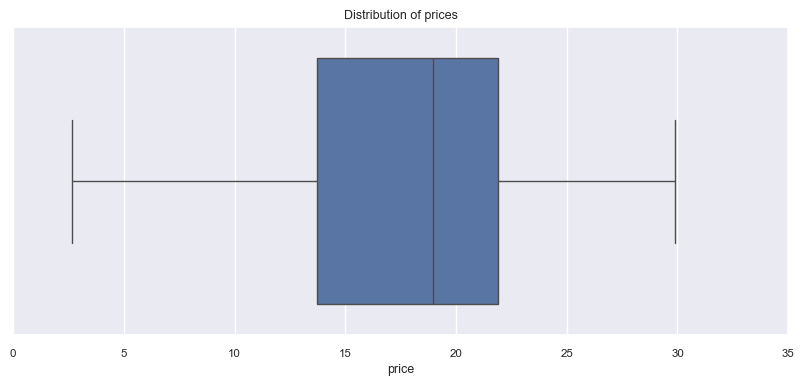

In [71]:
plt.figure()
sns.set(rc={"figure.figsize": (5, 2)}, font_scale=0.75)
web_prices_box = sns.boxplot(x=web_csv["price"])
web_prices_box.set(title = "Distribution of prices")
web_prices_box.set_xlim(0,35);

## Top 10 bestsellers

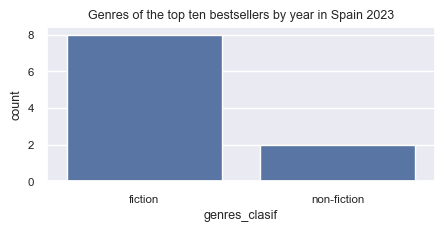

In [72]:
plt.figure()
sns.set(rc={"figure.figsize": (3, 4)}, font_scale=0.75)
web_genres = sns.countplot(data = web_csv.head(10) , x ="genres_clasif")
web_genres.set(title = "Genres of the top ten bestsellers by year in Spain 2023");

## Editorials

C:\Users\gdcma\AppData\Local\Temp\ipykernel_3052\1702831447.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  editorials_2023.set_xticklabels(editorials_2023.get_xticklabels(), rotation=45, horizontalalignment='right');


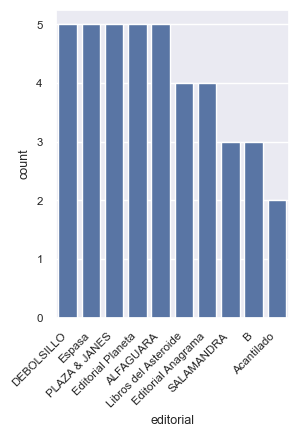

In [73]:
plt.figure()
sns.set(rc={"figure.figsize": (3, 4)}, font_scale=0.75)
editorials_2023 = sns.countplot(data = web_csv , x="editorial", order = web_csv["editorial"].value_counts().iloc[:10].index)
editorials_2023.set_xticklabels(editorials_2023.get_xticklabels(), rotation=45, horizontalalignment='right');

## Foreign books

In [108]:
web_csv.loc[4,"orig_language"] = "Francés"
web_csv.loc[68,"orig_language"] = "Castellano"
web_csv.loc[34,"orig_language"] = "Noruego"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_3052\3878593576.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  foreign_2023.set_xticklabels(foreign_2023.get_xticklabels(), rotation=45, horizontalalignment='right');


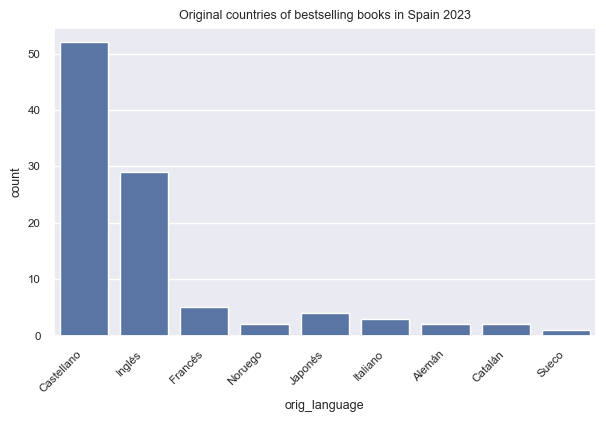

In [115]:
plt.figure()
sns.set(rc={"figure.figsize": (7, 4)}, font_scale=0.75)
foreign_2023 = sns.countplot(data = web_csv , x="orig_language")
foreign_2023.set_xticklabels(foreign_2023.get_xticklabels(), rotation=45, horizontalalignment='right');
foreign_2023.set(title = "Original countries of bestselling books in Spain 2023");

# Indie bookshops Spain 2020 and 2023 vs Amazon

In [229]:
shops = pd.concat([spanish_csv, web_csv])

In [230]:
def anyo(x):
    if x["price"] > 0:
        return "2023"
    else:
        return "2020"
shops["year_best"] = shops.apply(anyo, axis=1)
shops["orig_language"] = shops["orig_language"].apply(lambda x : "Castellano" if x == "Español" else x)

## Genres

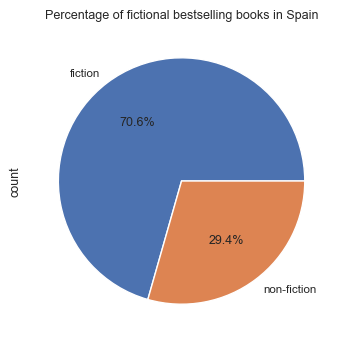

In [231]:
plt.figure()
shop_genres = shops["genres_clasif"].value_counts().plot.pie(autopct="%.1f%%");
shop_genres.set(title = "Percentage of fictional bestselling books in Spain");

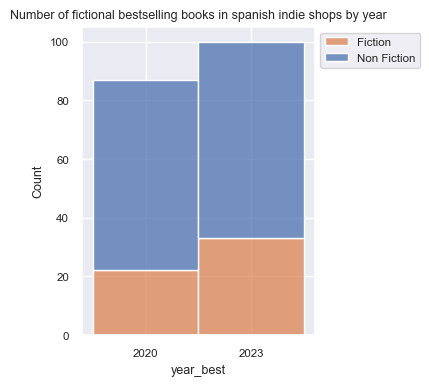

In [232]:
sns.set(rc={"figure.figsize": (3, 4)}, font_scale=0.75)
shops_genres_years = sns.histplot(shops, x="year_best", hue = "genres_clasif", multiple="stack", bins = 2)
shops_genres_years.set(title = "Number of fictional bestselling books in spanish indie shops by year")
shops_genres_years.legend(["Fiction", "Non Fiction"], bbox_to_anchor=(1, 1));

## Top ten bestsellers

In [233]:
shops_top_2020 = shops[shops["year_best"] == "2020"].head(10)
shops_top_2023 = shops[shops["year_best"] == "2023"].head(10)

In [234]:
shops_top_2020.genres_clasif.value_counts()

genres_clasif
fiction        7
non-fiction    2
Name: count, dtype: int64

In [235]:
shops_top_2023.genres_clasif.value_counts()

genres_clasif
fiction        8
non-fiction    2
Name: count, dtype: int64

In [236]:
shops_top = pd.concat([shops_top_2020, shops_top_2023])

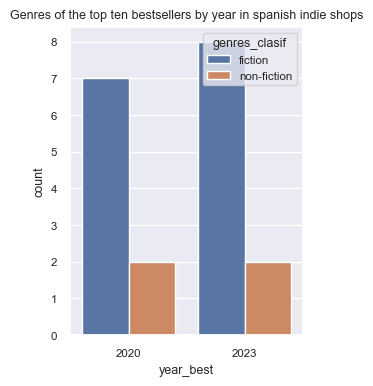

In [237]:
plt.figure()
sns.set(rc={"figure.figsize": (5, 4)}, font_scale=0.75)
shops_genres_years = sns.countplot(data = shops_top , hue ="genres_clasif", x="year_best" )
shops_genres_years.set(title = "Genres of the top ten bestsellers by year in spanish indie shops");

## Editorials

C:\Users\gdcma\AppData\Local\Temp\ipykernel_3052\428271783.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  edit_2020.set_xticklabels(edit_2020.get_xticklabels(), rotation=45, horizontalalignment='right');


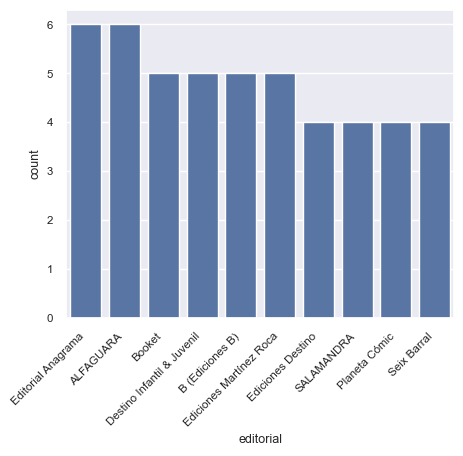

In [238]:
shops_edit_2020 = shops[shops["year_best"]=="2020"]
edit_2020 = sns.countplot(data = shops_edit_2020, x = "editorial", order = shops_edit_2020["editorial"].value_counts().iloc[:10].index)
edit_2020.set_xticklabels(edit_2020.get_xticklabels(), rotation=45, horizontalalignment='right');

C:\Users\gdcma\AppData\Local\Temp\ipykernel_3052\842874.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  edit_2023.set_xticklabels(edit_2023.get_xticklabels(), rotation=45, horizontalalignment='right');


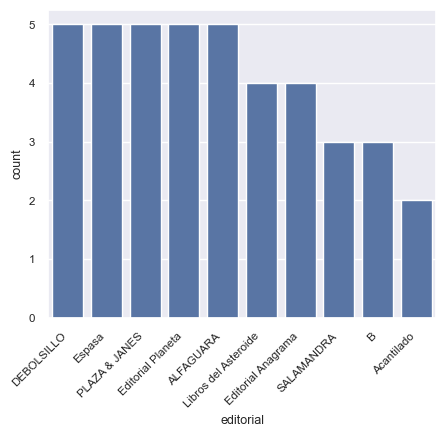

In [239]:
shops_edit_2023 = shops[shops["year_best"]=="2023"]
edit_2023 = sns.countplot(data = shops_edit_2023, x = "editorial", order = shops_edit_2023["editorial"].value_counts().iloc[:10].index)
edit_2023.set_xticklabels(edit_2023.get_xticklabels(), rotation=45, horizontalalignment='right');

## Foreign books

C:\Users\gdcma\AppData\Local\Temp\ipykernel_3052\2520460729.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  foreign_shops.set_xticklabels(foreign_shops.get_xticklabels(), rotation=45, horizontalalignment='right');


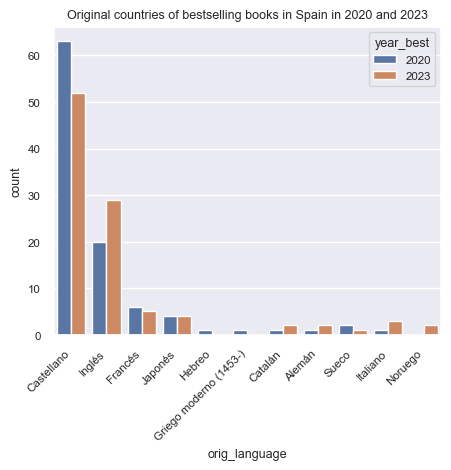

In [240]:
plt.figure()
sns.set(rc={"figure.figsize": (7, 4)}, font_scale=0.75)
foreign_shops = sns.countplot(data = shops , x="orig_language", hue="year_best")
foreign_shops.set_xticklabels(foreign_shops.get_xticklabels(), rotation=45, horizontalalignment='right');
foreign_shops.set(title = "Original countries of bestselling books in Spain in 2020 and 2023");